In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
from dask.distributed import Client, LocalCluster
import dask.dataframe as df

In [4]:
dask_cluster = LocalCluster(n_workers=10, threads_per_worker=1)
dask_client = Client(dask_cluster)

In [5]:
dask_client

Client Scheduler: tcp://127.0.0.1:58949 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 10 Cores: 10 Memory: 17.10 GB


# Combine the Kangyur and Tengyur

In [6]:
from tibert.data import CorpusSplitType, KangyurLoader, TengyurLoader

In [7]:
kangyur_df = KangyurLoader("../../tibert_data/").remove_new_lines().dataframe
tengyur_df = TengyurLoader('../../tibert_data').remove_new_lines().dataframe
kangyur_df['corpus'], tengyur_df['corpus'] = 'kangyur', 'tengyur'
corpora_df = kangyur_df.append(tengyur_df)

In [8]:
corpora_df = corpora_df[~(corpora_df.text == '')]

In [9]:
corpora_df.head(20)

,filename,volume_number,location,text,corpus
1,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur
2,001_འདུལ་བ།_ཀ.txt,1,F.2.a,རྩོད་པ་དང་། །དགེ་འདུན་དབྱེན་རྣམས་བསྡུས་པ་ཡིན། ...,kangyur
3,001_འདུལ་བ།_ཀ.txt,1,F.2.b,ཡུལ་ཨང་ག་ཙམ་པ་མ་གཏོགས་པ་བཅོམ་ནས་ཕྱིར་ལྡོག་པར་བ...,kangyur
4,001_འདུལ་བ།_ཀ.txt,1,F.3.a,པོ་འདི་ནི་གདུག་པ། ཕ་རོལ་གནོན་པ། དཔུང་དང་མཐུ་ཆེ...,kangyur
5,001_འདུལ་བ།_ཀ.txt,1,F.3.b,ཁྱུད་མཐའ་ཡས་ཀྱི་བུ་བཙས་སོ། །ཀཽ་ཤཱམ་བཱིར་ནི་རྒྱ...,kangyur
6,001_འདུལ་བ།_ཀ.txt,1,F.4.a,གི་བུ་འདིའི་མཐུ་ཡིན་ནོ་སྙམ་མོད་ཀྱི། དེ་ནི་དེ་ལ...,kangyur
7,001_འདུལ་བ།_ཀ.txt,1,F.4.b,དང་། གཅད་པ་དང་། དྲལ་བ་དང་། དབུག་པ་དང་། གནས་ལྔ་...,kangyur
8,001_འདུལ་བ།_ཀ.txt,1,F.5.a,ཡང་བསྡུ་བར་བརྩམས་ཏེ། དེ་དག་འོངས་ནས་ཕྱིར་ལྡོག་པ...,kangyur
9,001_འདུལ་བ།_ཀ.txt,1,F.5.b,རྒྱལ་པོ་རྒྱལ་རིགས་སྤྱི་བོར་དབང་བསྐུར་བ་ལགས་ན། ...,kangyur
10,001_འདུལ་བ།_ཀ.txt,1,F.6.a,ཀྱིས་ཀུན་ནས་ཡོངས་སུ་བསྲུང་བར་བྱའོ། །དེ་དག་གིས་...,kangyur


# Sanity check

In [50]:
corpora_df['is_doc_start'] = corpora_df.text.str.contains('༄')

In [38]:
corpora_df.is_doc_start.astype(int).sum().compute()

4369

In [39]:
doc_starts_df = corpora_df[corpora_df.is_doc_start].compute()
doc_starts_df

,filename,volume_number,location,text,corpus,is_doc_start
1,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,True
0,002_འདུལ་བ།_ཁ.txt,2,F.1.a,༄༅། །འདུལ་བ་ཁ་བཞུགས་སོ། །,kangyur,True
0,003_འདུལ་བ།_ག.txt,3,F.1.a,༄༅། །འདུལ་བ་ག་བཞུགས་སོ། །,kangyur,True
0,004_འདུལ་བ།_ང.txt,4,F.1.a,༄༅། །འདུལ་བ་ང་བཞུགས་སོ།།,kangyur,True
1,004_འདུལ་བ།_ང.txt,4,F.1.b,༄༅༅། །འདུལ་བ་གཞི། བམ་པོ་བརྒྱད་བཅུ་གསུམ་པ། གཟིག...,kangyur,True
...,...,...,...,...,...,...
312,213_དཀར་ཆག.txt,213,F.157.a,དྷརྨོཏྟརཱནནྡདདཱཏིལོཀེཏྱཱགོམཧཱརམྦྷམཧཱཙདྷཱིརཀྲྀཏ...,tengyur,True
534,213_དཀར་ཆག.txt,213,F.268.a,༄༅། །ཀལྤསྱཙིརཱམྦུཔེཡམརྷཥྱཱཤྭཱསཱགཏཡཱབཏཿཀཐཱརྵེཿཀ...,tengyur,True
672,213_དཀར་ཆག.txt,213,F.337.a,༄༅། །ནཱམཱཨུཔལཀྵཎསྱདྷརྨཱཎཱཾ། ཡོནཱམམུཁེཝནིཤྩིཏགྲ...,tengyur,True
936,213_དཀར་ཆག.txt,213,F.469.a,༄༅། །ནིརྤཱཔཾཧིམརཛསཉྩིཏྶམུཏྠཱཾ། སྭཱགཏྱཿཀུཤལགཎཱཔ...,tengyur,True


In [40]:
corpora_df.groupby(['corpus', 'volume_number']).is_doc_start.sum().compute()

corpus   volume_number
kangyur  1                 1.0
         2                 1.0
         3                 1.0
         4                 2.0
         5                 3.0
                          ... 
tengyur  209               2.0
         210               1.0
         211              27.0
         212              12.0
         213               9.0
Name: is_doc_start, Length: 316, dtype: float64

# Save as BERT-like dataset

## Split into sections

In [10]:
corpora_df["split_text"] = corpora_df \
    .text \
    .str.replace(' ', '_ ') \
    .str.split(' ')

In [11]:
corpora_df = corpora_df.explode("split_text").reset_index(drop=True)
corpora_df["split_text"] = corpora_df.split_text.str.strip()

In [12]:
corpora_df.head(30)

,filename,volume_number,location,text,corpus,split_text
0,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,༄༅༅།_
1,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,།རྒྱ་གར་སྐད་དུ།_
2,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,བི་ན་ཡ་བསྟུ།_
3,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,བོད་སྐད་དུ།_
4,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,འདུལ་བ་གཞི།_
5,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,བམ་པོ་དང་པོ།_
6,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,དཀོན་མཆོག་གསུམ་ལ་ཕྱག་འཚལ་ལོ།_
7,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,།གང་གིས་འཆིང་རྣམས་ཡང་དག་རབ་བཅད་ཅིང་།_
8,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,།མུ་སྟེགས་ཚོགས་རྣམས་ཐམས་ཅད་རབ་བཅོམ་སྟེ།_
9,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...,kangyur,།སྡེ་དང་བཅས་པའི་བདུད་རྣམས་ངེས་བཅོམ་ནས།_


## Make save group divisions

In [13]:
corpora_df["save_group"] = corpora_df.volume_number.map(lambda vn: vn % 20)

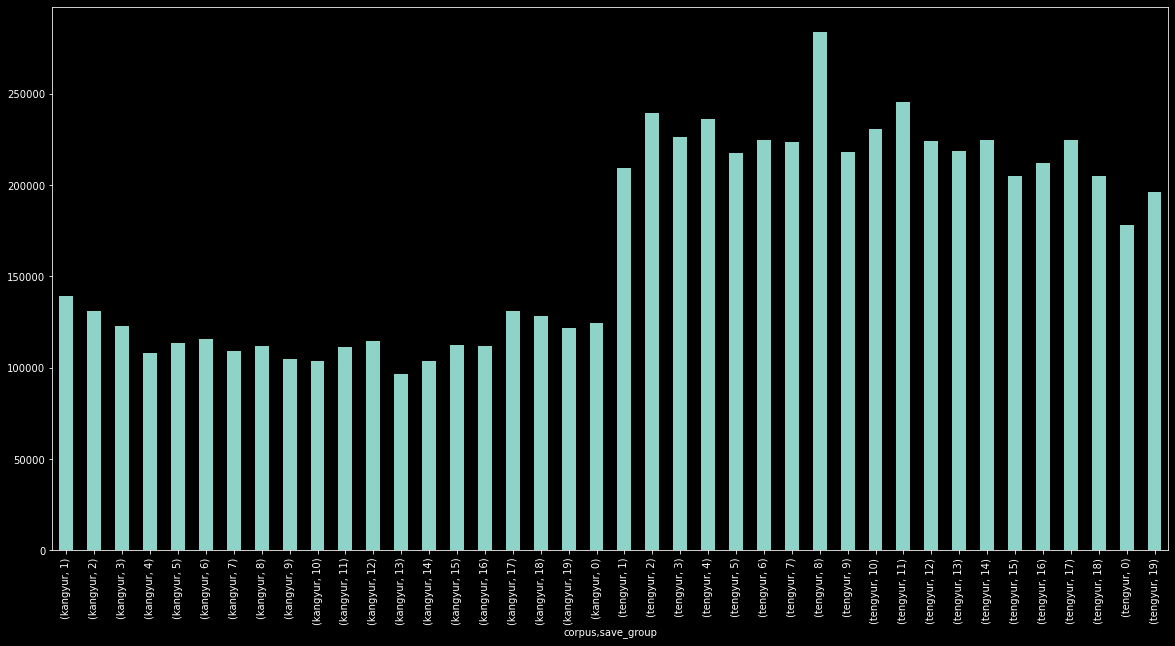

In [14]:
corpora_df.groupby(['corpus', 'save_group']).count().compute().split_text.plot(kind='bar', figsize=(20, 10))

In [15]:
corpora_df['save_group'] = 'train_' + corpora_df.corpus + corpora_df.save_group.astype(str)

In [16]:
corpora_df = corpora_df.set_index('save_group')

In [17]:
divisions = sorted(['train_kangyur' + str(i) for i in range(20)] + ['train_tengyur' + str(i) for i in range(20)])
divisions = divisions + [divisions[-1]]
# See here: https://stackoverflow.com/questions/54307559/repartition-dask-dataframe-with-custom-index

In [18]:
corpora_df = corpora_df.repartition(divisions=divisions)

In [19]:
corpora_df.npartitions

40

## Save

In [20]:
save_dir = "c:/workspace/tibert_data/training/tibetan_sections/bert-like-endogenous-docs"

In [21]:
import unicodedata

In [22]:
doc_start_chars = set([unicodedata.lookup(l) for l in [
    'TIBETAN MARK INITIAL YIG MGO MDUN MA',
    'TIBETAN MARK CLOSING YIG MGO SGAB MA']])
doc_start_chars

{'༄', '༅'}

In [23]:
def save_partition_to_disk(partition, save_dir):
    import os
    part_name, broken = partition.index[0], True
    with open(os.path.join(save_dir, part_name + ".txt"), mode='w', encoding='utf-8') as f:
        for _, cur_text in partition.iteritems():
            cur_text = str(cur_text)
            if len(cur_text) == 0:
                continue
            if any([c in doc_start_chars for c in cur_text]):
                if not broken:
                    f.write('\n')
                f.write('\n')
            broken = cur_text[-1] == '_'
            if broken:
                f.write(cur_text[:-1] + '\n')
            else:
                f.write(cur_text)

In [24]:
_ = corpora_df.split_text.map_partitions(save_partition_to_disk, save_dir, meta=pd.Series([None])).compute()